<a href="https://colab.research.google.com/github/JMML2021/0401_Registre-de-logs/blob/main/Registre_de_logs_2_parte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
# importing libraries
from urllib.request import urlretrieve
import pandas as pd
import os
import re
from datetime import datetime
import pytz
import geocoder
import folium
import time
import urllib.request
import json
import geopandas
import matplotlib.pyplot as plt
from datetime import datetime

In [126]:
#!conda --version # now returns 4.8.3

In [127]:
#!pip install geopandas

In [128]:
#!pip install geopandas

In [129]:
#!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [130]:
#!pip install geocoder


In [131]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
# Abro el fichero una vez adecuado

path = ('/content/drive/MyDrive/01_COLAB/' +'direcionesIP.csv')
df=  pd.read_csv(path)

In [133]:
df.dtypes

Unnamed: 0        int64
virtual_host     object
IPs              object
Fecha            object
request          object
status           object
size             object
referer          object
user_agent      float64
dtype: object

In [134]:
data_ip =df["IPs"].value_counts().rename_axis('ip').reset_index(name="visits")
data_ip.head()

,ip,visits
0,66.249.76.216,415
1,127.0.0.1,21
2,157.55.33.97,7
3,199.30.20.223,6
4,157.55.35.112,4


In [135]:
data_ip.head(3)

,ip,visits
0,66.249.76.216,415
1,127.0.0.1,21
2,157.55.33.97,7


In [136]:
import geocoder
ip = geocoder.ip("157.55.35.112")
print(ip.city)
print(ip)
print(ip.latlng)

Redmond
<[OK] Ipinfo - Geocode [Redmond, Washington, US]>
[47.674, -122.1215]


In [137]:
# Trato el tema de las IP para saber la localizacion
# creo una lista con un dicionario dentro
data1 = []

for index, value in data_ip["ip"].items():
    with urllib.request.urlopen("https://geolocation-db.com/jsonp/"+value,timeout=500) as url:
                data = url.read().decode()
                data = data.split("(")[1].strip(")")
                data = json.loads(data)
                data1.append(data)

In [138]:
# Me he quitado la linea que tiene ' NO Values'
data1= data1[2:]

In [139]:
geolocal = pd.DataFrame(data1)
geolocal[:3]

,country_code,country_name,city,postal,latitude,longitude,IPv4,state
0,US,United States,None,None,47.6062,-122.3321,157.55.33.97,Washington
1,US,United States,Boydton,23917,36.6544,-78.3752,199.30.20.223,Virginia
2,US,United States,None,None,47.6062,-122.3321,157.55.35.112,Washington


In [140]:
geolocal["visit"] = data_ip["visits"]
geolocal["visit"][:3]

0    415
1     21
2      7
Name: visit, dtype: int64

In [141]:
geolocal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  40 non-null     object 
 1   country_name  40 non-null     object 
 2   city          11 non-null     object 
 3   postal        11 non-null     object 
 4   latitude      41 non-null     float64
 5   longitude     41 non-null     float64
 6   IPv4          41 non-null     object 
 7   state         38 non-null     object 
 8   visit         41 non-null     int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 3.0+ KB


In [142]:
print(geolocal['latitude'][:3][0],geolocal['latitude'][:3][1],geolocal['latitude'][:3][2])
a=geolocal['latitude'][0]
print(a)
type(a)

47.6062 36.6544 47.6062
47.6062


numpy.float64

In [143]:
geolocal['latitude']

0     47.6062
1     36.6544
2     47.6062
3     37.3824
4     55.7386
5     39.9289
6     52.3556
7     39.9289
8     39.9289
9     36.6544
10    32.7787
11    39.9289
12    39.9289
13    39.9289
14    52.3556
15    39.9289
16    47.6062
17    52.3556
18    39.9289
19    39.9289
20    39.9289
21    48.8582
22    47.0000
23    39.9289
24    39.9289
25    39.9289
26    39.9289
27    39.9289
28    39.9289
29    52.3556
30    52.3556
31    52.3556
32    39.9289
33    47.6062
34    39.9289
35    39.9289
36    39.9289
37    39.9289
38    39.9289
39    51.2686
40    39.9289
Name: latitude, dtype: float64

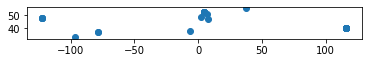

In [144]:
gdf = geopandas.GeoDataFrame(geolocal, geometry=geopandas.points_from_xy(geolocal['longitude'],geolocal['latitude']))
gdf.plot()

In [145]:

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [146]:
import geopandas

path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


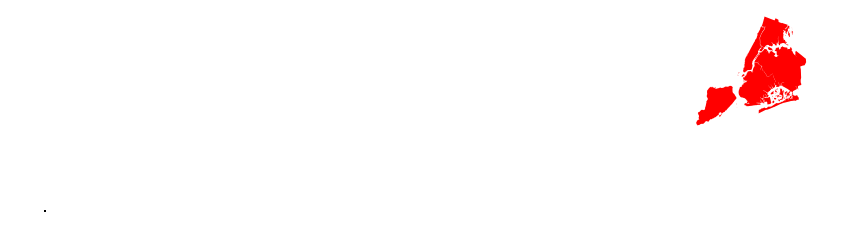

In [155]:
fig, ax = plt.subplots(figsize=(15,20))

ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')
ax.set_axis_off()

gdf.plot(ax=ax, marker='o', color='red', markersize=5)
#plt.show()

In [148]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[40.965, -5.664], zoom_start=4)
mc = MarkerCluster()

In [163]:
for i in range(0,len(geolocal)):
    mc.add_child(folium.Marker(
        location=[geolocal.iloc[i]["latitude"],geolocal.iloc[i]["longitude"]],

        popup=geolocal.iloc[i]["IPv4"],))
    
#folium.Circle(location=[geolocal.iloc[i]["latitude"],geolocal.iloc[i]["longitude"]],   color='Red', fill=True, fill_color='Red',
#              radius=int(popup=geolocal.iloc[i]["IPv4"]) * 30).add_to(m)
m.add_child(mc)
 

In [160]:
geolocal.iloc[3]

country_code                         ES
country_name                      Spain
city                            Seville
postal                            41001
latitude                        37.3824
longitude                       -5.9761
IPv4                        217.12.28.5
state                           Seville
visit                                 6
geometry        POINT (-5.9761 37.3824)
Name: 3, dtype: object